<a href="https://colab.research.google.com/github/joaopaulodg/api-produto/blob/master/An%C3%A1lise_de_A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
##BIBLIOTECAS 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf 

In [10]:
#AQUISIÇÃO DOS DADOS DAS AÇÕES 
ticket = yf.Ticker('^BVSP')
df = ticket.history(interval='1d', start='2018-04-01', end='2021-04-23')

df
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-15,120290.0,121409.0,120084.0,120701.0,7948100,0,0
2021-04-16,120701.0,121333.0,120199.0,121114.0,7945600,0,0
2021-04-19,121116.0,121974.0,120682.0,120934.0,10028100,0,0
2021-04-20,120925.0,121354.0,119841.0,120062.0,7811500,0,0
2021-04-22,120064.0,120995.0,119203.0,119371.0,8598600,0,0


In [11]:
df[['Close']]

,Close
Date,
2018-04-02,84666.0
2018-04-03,84623.0
2018-04-04,84360.0
2018-04-05,85210.0
2018-04-06,84820.0
...,...
2021-04-15,120701.0
2021-04-16,121114.0
2021-04-19,120934.0


In [15]:
decomposicao = seasonal_decompose(df[['Close']], model='additive', freq=30, extrapolate_trend=30)

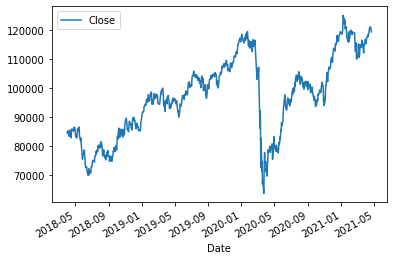

In [16]:
df[['Close']].plot()

In [17]:
decomposicao.seasonal + decomposicao.resid + decomposicao.trend

,Close
Date,
2018-04-02,84666.0
2018-04-03,84623.0
2018-04-04,84360.0
2018-04-05,85210.0
2018-04-06,84820.0
...,...
2021-04-15,120701.0
2021-04-16,121114.0
2021-04-19,120934.0


In [18]:
decomposicao.trend.iloc[0:5]

,Close
Date,
2018-04-02,91049.684946
2018-04-03,90733.638118
2018-04-04,90417.591290
2018-04-05,90101.544462
2018-04-06,89785.497634


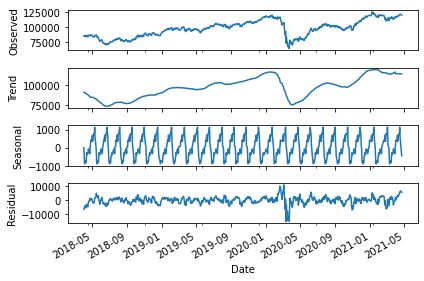

In [19]:
decomposicao.plot();

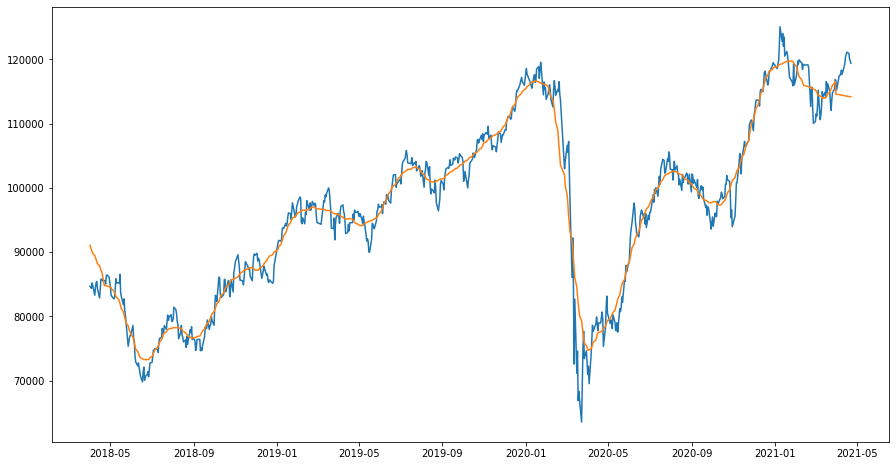

In [21]:
ax, fig = plt.subplots(figsize=(15,8))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)

In [25]:
df['Close'].rolling(7).mean()

Date
2018-04-02              NaN
2018-04-03              NaN
2018-04-04              NaN
2018-04-05              NaN
2018-04-06              NaN
                  ...      
2021-04-15    118958.857143
2021-04-16    119457.428571
2021-04-19    119831.857143
2021-04-20    120173.571429
2021-04-22    120253.428571
Name: Close, Length: 752, dtype: float64

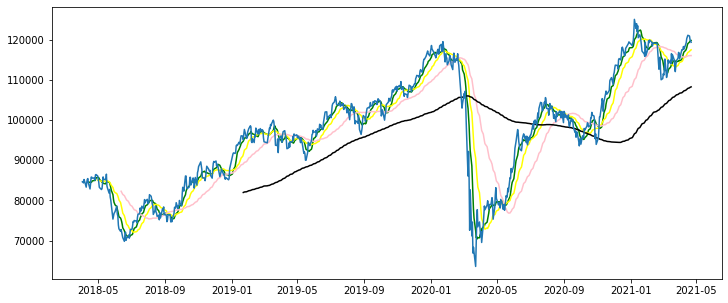

In [28]:
#CALCULANDO MÉDIAS MÓVEIS E PLOTANDO GRÁFICO
media_movel9d = df['Close'].rolling(9).mean()
media_movel21d = df['Close'].rolling(21).mean()
media_movel50d = df['Close'].rolling(50).mean()
media_movel200d = df['Close'].rolling(200).mean()

fig, ax = plt.subplots(figsize=(12,5))
plt.plot(media_movel9d, 'green')
plt.plot(media_movel21d, 'yellow')
plt.plot(media_movel50d, 'pink')
plt.plot(media_movel200d, 'black')
plt.plot(df['Close'])


In [29]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-02,85365.0,85675.0,84166.0,84666.0,2598500,0,0
2018-04-03,84669.0,85411.0,84210.0,84623.0,2579000,0,0
2018-04-04,84610.0,84610.0,82826.0,84360.0,2948300,0,0
2018-04-05,84374.0,86148.0,84374.0,85210.0,4257700,0,0
2018-04-06,85210.0,85210.0,83833.0,84820.0,3069100,0,0


In [30]:
df['Close'].head()

Date
2018-04-02    84666.0
2018-04-03    84623.0
2018-04-04    84360.0
2018-04-05    85210.0
2018-04-06    84820.0
Name: Close, dtype: float64

In [31]:
df['Close'].shift()

Date
2018-04-02         NaN
2018-04-03     84666.0
2018-04-04     84623.0
2018-04-05     84360.0
2018-04-06     85210.0
                ...   
2021-04-15    120295.0
2021-04-16    120701.0
2021-04-19    121114.0
2021-04-20    120934.0
2021-04-22    120062.0
Name: Close, Length: 752, dtype: float64

In [33]:
df['rentabilidade'] = df['Close'] /df['Close'].shift() * 100 - 100
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rentabilidade
Date,,,,,,,,
2018-04-02,85365.0,85675.0,84166.0,84666.0,2598500,0,0,NaN
2018-04-03,84669.0,85411.0,84210.0,84623.0,2579000,0,0,-0.050788
2018-04-04,84610.0,84610.0,82826.0,84360.0,2948300,0,0,-0.310790
2018-04-05,84374.0,86148.0,84374.0,85210.0,4257700,0,0,1.007587
2018-04-06,85210.0,85210.0,83833.0,84820.0,3069100,0,0,-0.457693


In [36]:
#CORRELAÇÃO DE SÉRIES TEMPORAIS

tickets = ['VALE3.SA', 'ITUB4.SA', 'PETR4.SA', 'ABEV3.SA', 'BBDC4.SA', 'BBAS3.SA', '^BVSP', 'USDBRL=X']

dfs = []

for t in tickets: 
	print('Reading ticker {}...' .format(t))
	ticket =yf.Ticker(t)
	aux = ticket.history(interval='1d', start='2018-01-01', end='2021-01-01')
	aux.reset_index(inplace=True)
	aux['ticket'] = t 
	dfs.append(aux)
 

Reading ticker VALE3.SA...
Reading ticker ITUB4.SA...
Reading ticker PETR4.SA...
Reading ticker ABEV3.SA...
Reading ticker BBDC4.SA...
Reading ticker BBAS3.SA...
Reading ticker ^BVSP...
Reading ticker USDBRL=X...


In [38]:
#FALTA DEFINIR AS FEATURES

 #for d in dfs:
  # features_extraction(d)


NameError: ignored

In [62]:
   dfs[0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticket
0,2018-01-02,34.776320,35.894255,34.776320,35.877056,14156500,0.0,0,VALE3.SA
1,2018-01-03,35.971657,36.014654,35.515882,35.662075,12744200,0.0,0,VALE3.SA
2,2018-01-04,35.954455,36.436024,35.705069,35.808262,18433000,0.0,0,VALE3.SA
3,2018-01-05,35.748069,36.367233,35.524484,36.367233,15251300,0.0,0,VALE3.SA
4,2018-01-08,36.461827,37.175583,36.461827,37.175583,14542800,0.0,0,VALE3.SA
...,...,...,...,...,...,...,...,...,...
734,2020-12-22,83.115654,83.240048,81.747298,83.192207,23157000,0.0,0,VALE3.SA
735,2020-12-23,82.799879,83.756771,82.675485,83.594101,17710200,0.0,0,VALE3.SA
736,2020-12-28,84.005561,84.761506,83.326168,83.546249,26001300,0.0,0,VALE3.SA
737,2020-12-29,84.177801,84.397882,82.780740,83.316597,19727500,0.0,0,VALE3.SA


In [67]:
#PLOTANDO GRÁFICO DE CANDLES
import plotly.graph_objs as go

def plot_lines(df_, columns=['Open', 'Close', 'High', 'Low']):
	
	fig = go.Figure()
	for c in columns:
		fig.add_trace(go.Scatter(x = list(df_.index),
					y = df_[c],
					mode = 'markers+lines',
					name = c))
	return fig



In [70]:
def plotCandleStick(df, acao='ticket'):
	trace1 = {
		'x': df.index,
		'open': df.Open,
		'close': df.Close,
		'low': df.Low, 
    'high': df.High,
		'type': 'candlestick',
		'name': acao,
		'showlegend': False
	}
	
	data = [trace1]
	layout = go.Layout()
	
	fig = go.Figure(data=data, layout=layout)
	return fig

plotCandleStick(df)